# [Deep Learning](https://github.com/kyopark2014/ML-Algorithms/blob/main/deep-learning.md)

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
# tf.config.experimental.enable_op_determinism()

In [2]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


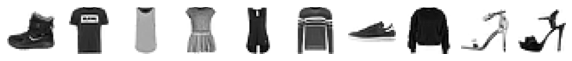

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [5]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [6]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='fashion')
    model.add(keras.layers.Flatten(input_shape=(28, 28), name='flatten'))   ## Batch Normalization
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))    ## Activation Function
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax', name='output'))
    return model

model = model_fn(keras.layers.Dropout(0.3))    ## Dropout

model.summary()

Model: "fashion"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2022-10-05 14:18:59.420436: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-05 14:18:59.420478: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-78-102.ap-northeast-2.compute.internal): /proc/driver/nvidia/version does not exist
2022-10-05 14:18:59.421427: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')   # Optimizer, Loss Function

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)   # Callback to save the best

history = model.fit(train_scaled, train_target, 
                    epochs=20, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb])        # epoch, batch_size

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5991 - accuracy: 0.7911 - val_loss: 0.4272 - val_accuracy: 0.8468
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4452 - accuracy: 0.8404 - val_loss: 0.3897 - val_accuracy: 0.8594
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4106 - accuracy: 0.8519 - val_loss: 0.3705 - val_accuracy: 0.8657
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3858 - accuracy: 0.8595 - val_loss: 0.3527 - val_accuracy: 0.8715
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3677 - accuracy: 0.8651 - val_loss: 0.3489 - val_accuracy: 0.8734
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3576 - accuracy: 0.8704 - val_loss: 0.3291 - val_accuracy: 0.8790
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3478 - accuracy: 0.8724 - val_loss: 0.3332 - val_accuracy:

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


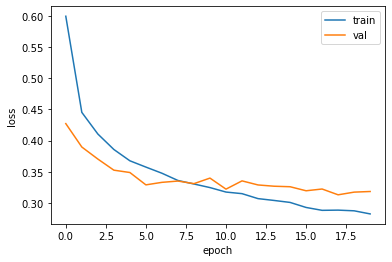

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 807us/step - loss: 0.3132 - accuracy: 0.8862


[0.31319329142570496, 0.8861666917800903]

In [11]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8794


[0.3434193432331085, 0.8794000148773193]

In [15]:
y_pred = model.predict(val_scaled)

In [18]:
print(y_pred[:1])

[[5.8515374e-14 1.1914461e-20 1.0000065e-16 4.5308814e-16 6.5125029e-14
  6.0072409e-07 5.5248391e-16 4.0645323e-09 9.9999940e-01 1.8261946e-13]]


In [20]:
from scipy.special import softmax
import numpy as np

proba = softmax(y_pred, axis=1)
print(np.round(proba, decimals=3))

[[0.085 0.085 0.085 ... 0.085 0.232 0.085]
 [0.085 0.085 0.085 ... 0.085 0.232 0.085]
 [0.085 0.085 0.085 ... 0.232 0.085 0.085]
 ...
 [0.085 0.085 0.085 ... 0.085 0.232 0.085]
 [0.085 0.085 0.085 ... 0.085 0.232 0.085]
 [0.107 0.089 0.092 ... 0.089 0.089 0.096]]


In [21]:
print(proba[:1])

[[0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533681
  0.08533674 0.08533674 0.23196916 0.08533674]]
